Bryan Jay - 260738764

## 1 - Data Acquisition


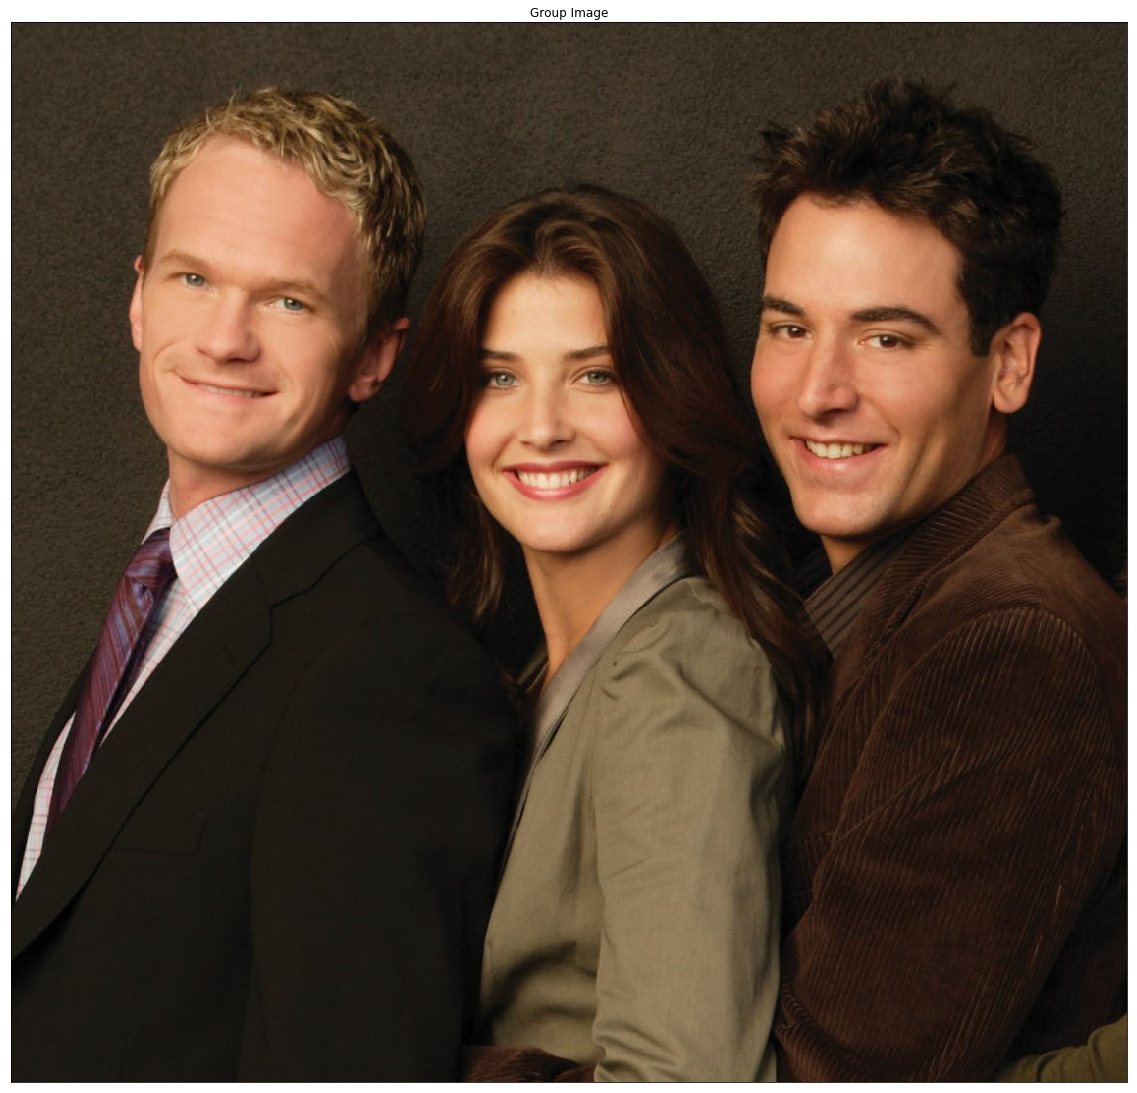

In [297]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

group_img = cv2.imread('./images/group-photo.jpg')

# display images
plt.figure(figsize=(20,20))
plt.subplot(111), plt.imshow(cv2.cvtColor(group_img, cv2.COLOR_BGR2RGB))
plt.title("Group Image"), plt.xticks([]), plt.yticks([])
plt.show()

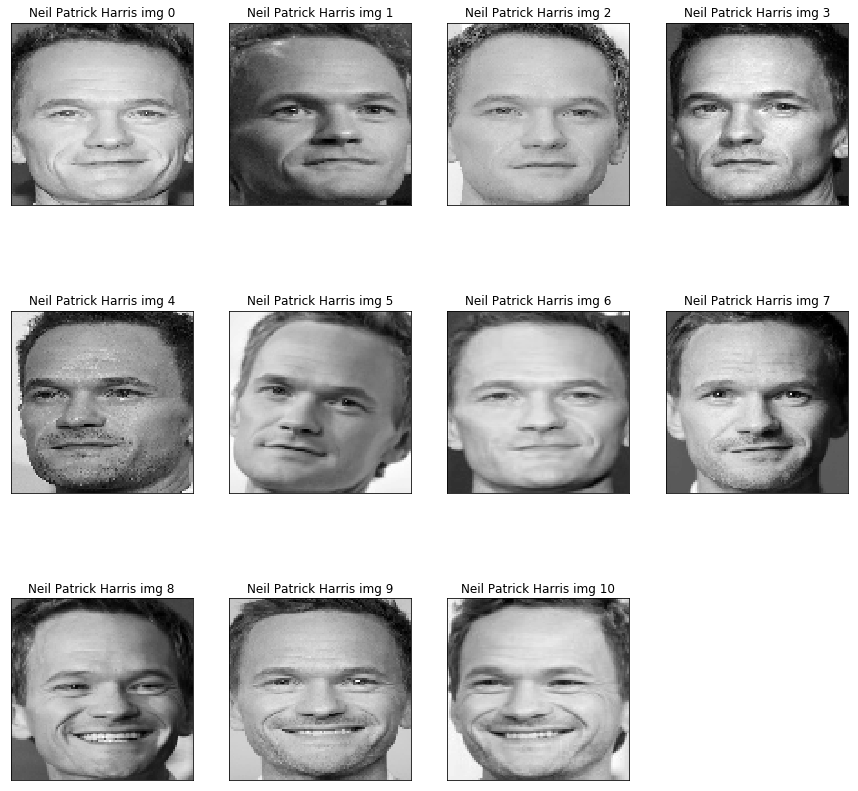

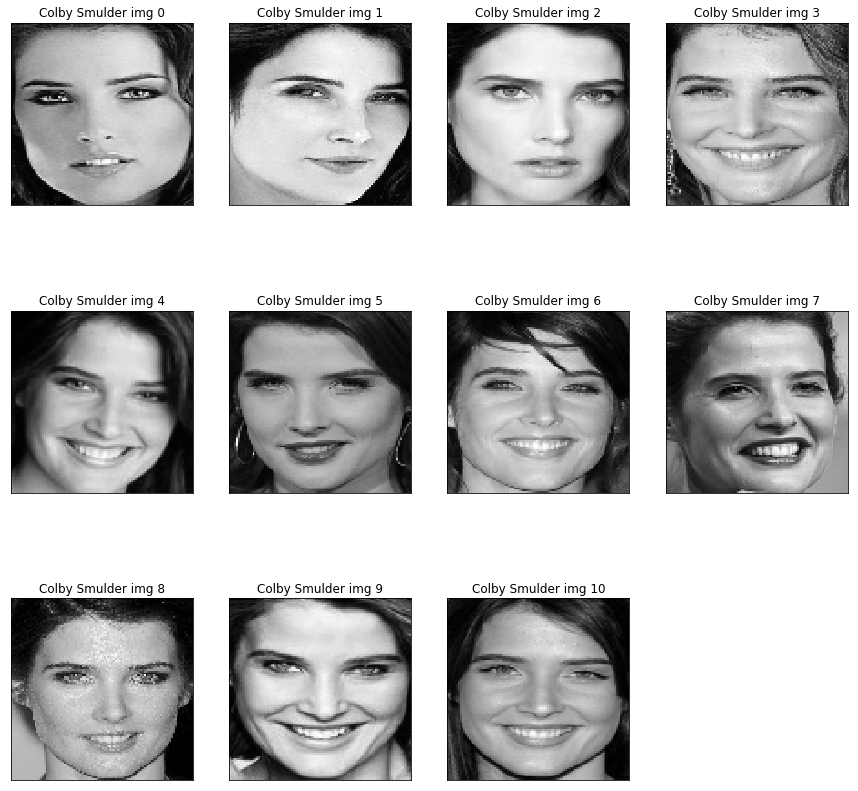

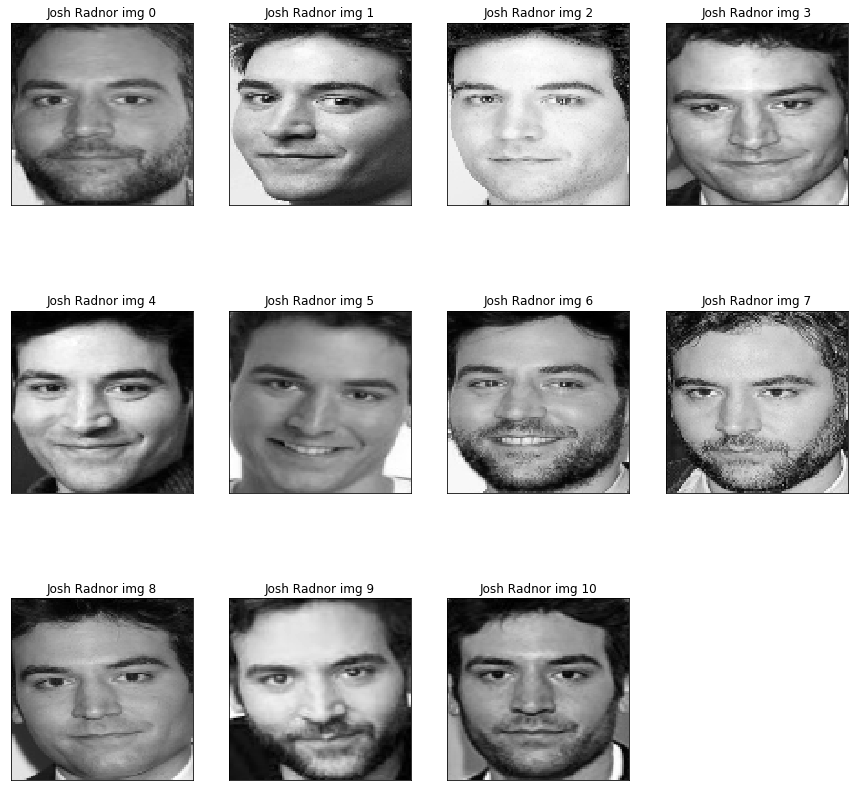

In [352]:
nph_img = []
cs_img = []
tm_img = []

size = (100,100)
for i in range(11):
    path = './images/{title}{index}.jpg'

    nph_resized = cv2.resize(cv2.imread(path.format(title='nph', index=i)), size)
    nph_img.append(cv2.cvtColor(nph_resized, cv2.COLOR_BGR2GRAY))
    
    cs_resized = cv2.resize(cv2.imread(path.format(title='cs', index=i)), size)
    cs_img.append(cv2.cvtColor(cs_resized, cv2.COLOR_BGR2GRAY))
    
    tm_resized = cv2.resize(cv2.imread(path.format(title='tm', index=i)), size)
    tm_img.append(cv2.cvtColor(tm_resized, cv2.COLOR_BGR2GRAY))

plt.figure(figsize=(15,15))
for i in range(11):
    plt.subplot(3,4,1+i), plt.imshow(nph_img[i], cmap='gray')
    plt.title("Neil Patrick Harris img " + str(i)), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(15,15))
for i in range(11):
    plt.subplot(3,4,1+i), plt.imshow(cs_img[i], cmap='gray')
    plt.title("Colby Smulder img " + str(i)), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(15,15))
for i in range(11):
    plt.subplot(3,4,1+i), plt.imshow(tm_img[i], cmap='gray')
    plt.title("Josh Radnor img " + str(i)), plt.xticks([]), plt.yticks([])
plt.show()

I selected the group photo because they were all looking at the camera and the lighting was good in the image. Additionally the background is all black so there is good contrast between the background and the lighter faces of the 3 people. In order to chose the 33 images, I looked for images where the celeb had good lighting and the face was easy to see in the background. The group of images have different features in them, since i took some rotated differently, some with teeth showing and with the head slightly rotated as well. All the images are resized to (100,100) so that M = 10,000

## 2 - Eigenvector Representation

In [364]:
# create the vector for each image, for the image
nph_vec = [np.reshape(nph_img[i], (nph_img[i].shape[0]*nph_img[i].shape[1],-1)) for i in range(len(nph_img))]
cs_vec = [np.reshape(cs_img[i], (cs_img[i].shape[0]*cs_img[i].shape[1],-1)) for i in range(len(cs_img))]
tm_vec = [np.reshape(tm_img[i], (tm_img[i].shape[0]*tm_img[i].shape[1],-1)) for i in range(len(tm_img))]

# put all the vectors into single array where each cell contains the image
nph_arr = np.hstack((nph_vec))
cs_arr = np.hstack((cs_vec))
tm_arr = np.hstack((tm_vec))

D = np.hstack((nph_arr, cs_arr, tm_arr))

In [365]:
# method from notes
# mean_D = D.mean(axis=0)
# D = D - mean_D
# # find the variance of the data
# # get N 
# N = D.shape[1]
# # get the variances
# var = [(1/(N-1)) * np.dot(np.dot(v.transpose(), np.dot(D, np.transpose(D))), v) for v in D.transpose()]

# print(var)

(33, 10000)


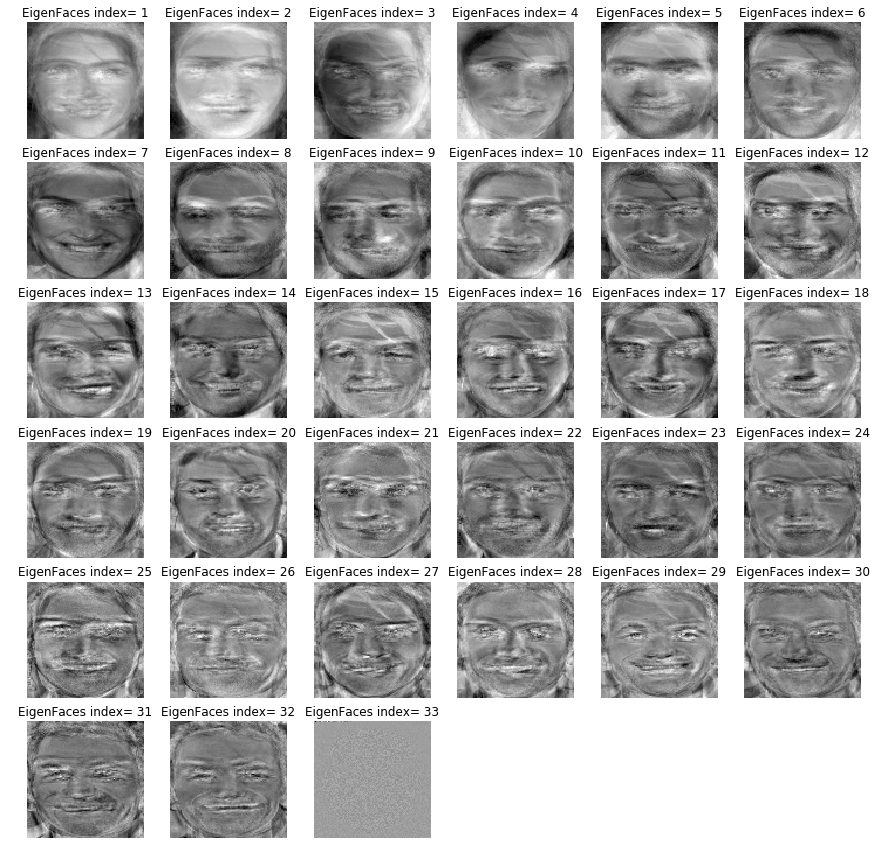

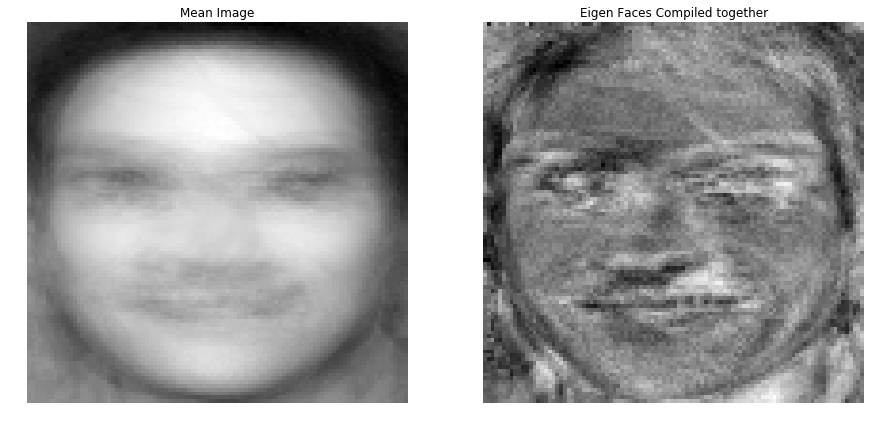

In [383]:
### put the images in rows instead of columns 
D_row = D.transpose()

# initalize the PCA object, with n components = 33 since we have 33 images 
n_components = 33
pca = PCA(n_components=n_components)

# fit the trainning data and center it beforehand
train_img = pca.fit_transform(D_row)

eig_vectors = pca.components_
print(eig_vectors.shape)

# calculate the mean of the data and display the mean face
mean = pca.mean_
meanface = mean.reshape(size)

plt.figure(figsize=(15,15))
for i, eig_face in enumerate(eig_faces):
    plt.subplot(6,6,1+i), plt.imshow(eig_face, cmap='gray')
    plt.title('EigenFaces index= %d' % (i+1)), plt.axis('off')
plt.show()

output = 0
eig_faces = []
for eig_vec in eig_vectors:
    eigface = eig_vec.reshape(size)
    eig_faces.append(eigface)
    output += eigface
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(meanface, cmap='gray')
plt.title('Mean Image'), plt.axis('off')
plt.subplot(122), plt.imshow(output, cmap='gray')
plt.title('Eigen Faces Compiled together'), plt.axis('off')
plt.show()

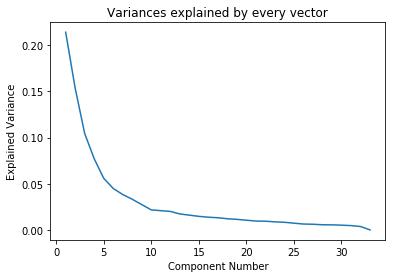

In [320]:
var = pca.explained_variance_ratio_

plt.title('Variances explained by every vector')
plt.plot(range(1, 34), var)
plt.xlabel('Component Number'), plt.ylabel('Explained Variance')
plt.show()

Above is the ratio of the variances explained at each vector. The ratio is a normalized approach which demonstrates the data.

No, not all the points are required to be used. When observing the graph, about most of the graph's big slope occurs from 0-15 and the rest has only marginal changed in its variance there fore the variance does not change much.

In [306]:
# fill all test data into one list
test_data = []
test_data.extend(nph_img)
test_data.extend(cs_img)
test_data.extend(tm_img)

names = ['NPH', 'CS', 'TM']
labels = []
# 0 = nph, 1 = cs, 2 = tm
# label the data
for i in range(33):
    if(i<11):
        labels.append(names[0])
    elif(i<22):
        labels.append(names[1])
    elif(i<33):
        labels.append(names[2])

print(len(test_data))
print(labels)

33
['NPH', 'NPH', 'NPH', 'NPH', 'NPH', 'NPH', 'NPH', 'NPH', 'NPH', 'NPH', 'NPH', 'CS', 'CS', 'CS', 'CS', 'CS', 'CS', 'CS', 'CS', 'CS', 'CS', 'CS', 'TM', 'TM', 'TM', 'TM', 'TM', 'TM', 'TM', 'TM', 'TM', 'TM', 'TM']


In [407]:
# initialize the classifier with k=2
nClassifier = KNeighborsClassifier(n_neighbors=2)

# convert test data list to array and reshape it into 1D
test_data = np.asarray(test_data)
train_data = test_data.reshape(test_data.shape[0], -1)

# fit the Kn classifier to the data
nClassifier.fit(train_data, labels)

# predict the original image
prediction = nClassifier.predict(train_data)
print(prediction)

['NPH' 'CS' 'NPH' 'NPH' 'NPH' 'NPH' 'NPH' 'NPH' 'NPH' 'NPH' 'NPH' 'CS'
 'CS' 'CS' 'CS' 'CS' 'CS' 'CS' 'CS' 'CS' 'CS' 'CS' 'TM' 'NPH' 'NPH' 'TM'
 'CS' 'NPH' 'TM' 'TM' 'TM' 'NPH' 'TM']


In [408]:
# check how many predictions are in the same class as the 
ref = 0
# print(len(labels))
for i in range(len(labels)):
    if labels[i] == prediction[i]:
        ref += 1

print(ref)

TypeError: 'int' object is not callable